In [1]:
from  urllib import request
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from nltk.corpus import stopwords
from collections import Counter
import re
from wordcloud import WordCloud, STOPWORDS



In [2]:
analysis_df = pd.read_csv('english_df.csv')
analysis_df.head(10)


,title,artist,winner,year,lyrics,preprocessed_lyrics,language,anger_pct,anticipation_pct,disgust_pct,fear_pct,joy_pct,negative_pct,positive_pct,sadness_pct,surprise_pct,trust_pct,gloom_index
0,Please Read The Letter,Robert Plant & Alison Krauss,1,2008,Please Read the Letter Caught out running with...,plea read letter caught run littl much hide ma...,en,0.000001,0.185000,0.005000,0.095000,0.015000,0.115000,0.030000,0.110000,0.010000,0.030000,100.000000
1,Bad Guy,Billie Eilish,1,2019,TranslationsHrvatskiTürkçeSvenskaEspañolРусски...,translationshrvatskitürkçesvenskaespañolрусски...,en,0.082474,0.036082,0.082474,0.087629,0.025773,0.103093,0.025773,0.103093,0.015464,0.025773,95.585958
2,If I Ever Lose My Faith In You (Single),Sting,0,1993,Sorrow (syrup rmx) Yea\nUh huh\nAbstract Art\n...,sorrow ( syrup rmx ) yea uh huh abstract art f...,en,0.047511,0.070136,0.052036,0.097285,0.049774,0.119910,0.088235,0.079186,0.033937,0.063348,95.165660
3,Not Ready To Make Nice,Dixie Chicks,1,2006,"Not Ready to Make Nice \nForgive, sounds good\...","readi make nice forgiv , sound good forget , '...",en,0.061321,0.061321,0.061321,0.070755,0.042453,0.113208,0.047170,0.094340,0.014151,0.047170,88.383346
4,Help Me (Single),Joni Mitchell,0,1974,Lilith \nSeptember\nDont rain on me\nDont thro...,lilith septemb dont rain dont throw back ocean...,en,0.020690,0.055172,0.027586,0.089655,0.041379,0.110345,0.055172,0.089655,0.013793,0.048276,87.458767
5,Paper Planes,M.I.A,0,2008,"Paper Planes \nI fly like paper, get high like...","paper plane fli like paper , get high like pla...",en,0.083636,0.069091,0.021818,0.065455,0.047273,0.101818,0.061818,0.065455,0.069091,0.054545,79.256437
6,Witchcraft (Single),Frank Sinatra,0,1958,Sweetest Maleficia [Gilles de Rais:]\nI conjur...,sweetest maleficia [ gill de rai : ] conjur ba...,en,0.047297,0.050676,0.060811,0.081081,0.037162,0.097973,0.067568,0.064189,0.016892,0.047297,77.984885
7,The Cave,Mumford & Sons,0,2011,The Cave \nIt's empty in the valley of your he...,"cave 's empti valley heart sun , rise slowli w...",en,0.037736,0.056604,0.006289,0.056604,0.056604,0.094340,0.094340,0.081761,0.025157,0.088050,75.944414
8,Girls Just Want To Have Fun (Single),Cyndi Lauper,0,1984,"Hey Now (Girls Just Wanna Have Fun) Hey now, h...","hey ( girl wan na fun ) hey , hey 's matter ? ...",en,0.003289,0.098684,0.016447,0.072368,0.092105,0.092105,0.105263,0.072368,0.006579,0.016447,75.412486
9,All I Wanna Do,Sheryl Crow,1,1994,All I Wanna Do \nHit it\nThis ain't no disco\n...,wan na hit ai n't disco ai n't countri club ei...,en,0.004049,0.097166,0.000001,0.072874,0.093117,0.064777,0.101215,0.060729,0.032389,0.036437,71.501612


Word count.

In [3]:
# stem lyrics
analysis_df['preprocessed_lyrics'] = analysis_df['preprocessed_lyrics'].str.replace(r'[^a-zA-Z\s]', '')
analysis_df['preprocessed_lyrics'] = analysis_df['preprocessed_lyrics'].str.lower().str.split()
analysis_df['preprocessed_lyrics'] = analysis_df['preprocessed_lyrics'].apply(lambda x: [item for item in x if item not in STOPWORDS])

# get word count
analysis_df['word_count'] = analysis_df['preprocessed_lyrics'].str.len()
analysis_df = analysis_df[analysis_df['word_count'] <= 500]
analysis_df.head()

/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_62849/1697798206.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  analysis_df['preprocessed_lyrics'] = analysis_df['preprocessed_lyrics'].str.replace(r'[^a-zA-Z\s]', '')


,title,artist,winner,year,lyrics,preprocessed_lyrics,language,anger_pct,anticipation_pct,disgust_pct,fear_pct,joy_pct,negative_pct,positive_pct,sadness_pct,surprise_pct,trust_pct,gloom_index,word_count
0,Please Read The Letter,Robert Plant & Alison Krauss,1,2008,Please Read the Letter Caught out running with...,"[plea, read, letter, caught, run, littl, much,...",en,0.000001,0.185000,0.005000,0.095000,0.015000,0.115000,0.030000,0.110000,0.010000,0.030000,100.000000,170
1,Bad Guy,Billie Eilish,1,2019,TranslationsHrvatskiTürkçeSvenskaEspañolРусски...,[translationshrvatskitrkesvenskaespaolromnport...,en,0.082474,0.036082,0.082474,0.087629,0.025773,0.103093,0.025773,0.103093,0.015464,0.025773,95.585958,166
2,If I Ever Lose My Faith In You (Single),Sting,0,1993,Sorrow (syrup rmx) Yea\nUh huh\nAbstract Art\n...,"[sorrow, syrup, rmx, yea, uh, huh, abstract, a...",en,0.047511,0.070136,0.052036,0.097285,0.049774,0.119910,0.088235,0.079186,0.033937,0.063348,95.165660,403
3,Not Ready To Make Nice,Dixie Chicks,1,2006,"Not Ready to Make Nice \nForgive, sounds good\...","[readi, make, nice, forgiv, sound, good, forge...",en,0.061321,0.061321,0.061321,0.070755,0.042453,0.113208,0.047170,0.094340,0.014151,0.047170,88.383346,182
4,Help Me (Single),Joni Mitchell,0,1974,Lilith \nSeptember\nDont rain on me\nDont thro...,"[lilith, septemb, dont, rain, dont, throw, bac...",en,0.020690,0.055172,0.027586,0.089655,0.041379,0.110345,0.055172,0.089655,0.013793,0.048276,87.458767,137


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_62849/1593390294.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=analysis_df, x='year', y='word_count', hue='winner', ci=None)


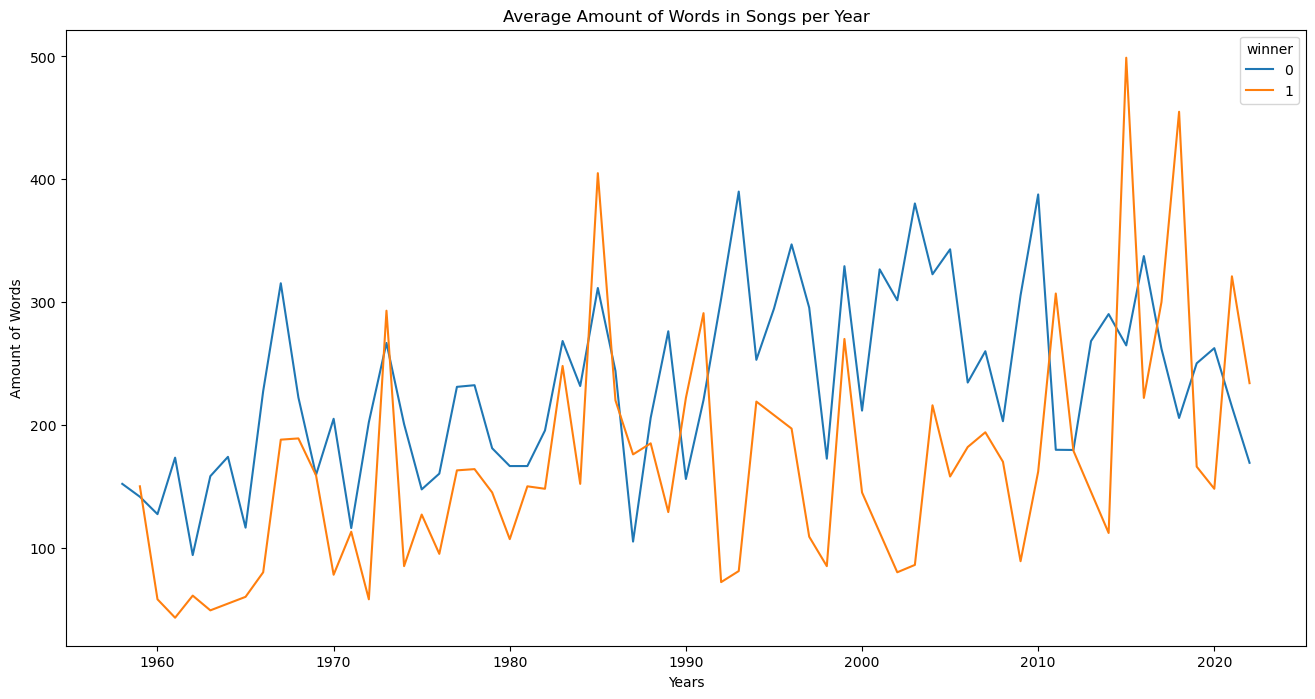

In [4]:
# Plot the average word count for each year
plt.figure(figsize=(16,8))
sns.lineplot(data=analysis_df, x='year', y='word_count', hue='winner', ci=None)
plt.title('Average Amount of Words in Songs per Year')
plt.xlabel('Years')
plt.ylabel('Amount of Words')
plt.savefig("words_count.png", bbox_inches='tight')
plt.show()


In [5]:
def count_unique_words(lst):
    return len(set(lst))

# apply the function to create a new column
analysis_df['unique_word_count'] = analysis_df['preprocessed_lyrics'].apply(lambda x: count_unique_words(x))


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_62849/164612390.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=analysis_df, x='year', y='unique_word_count', hue='winner', ci=None)


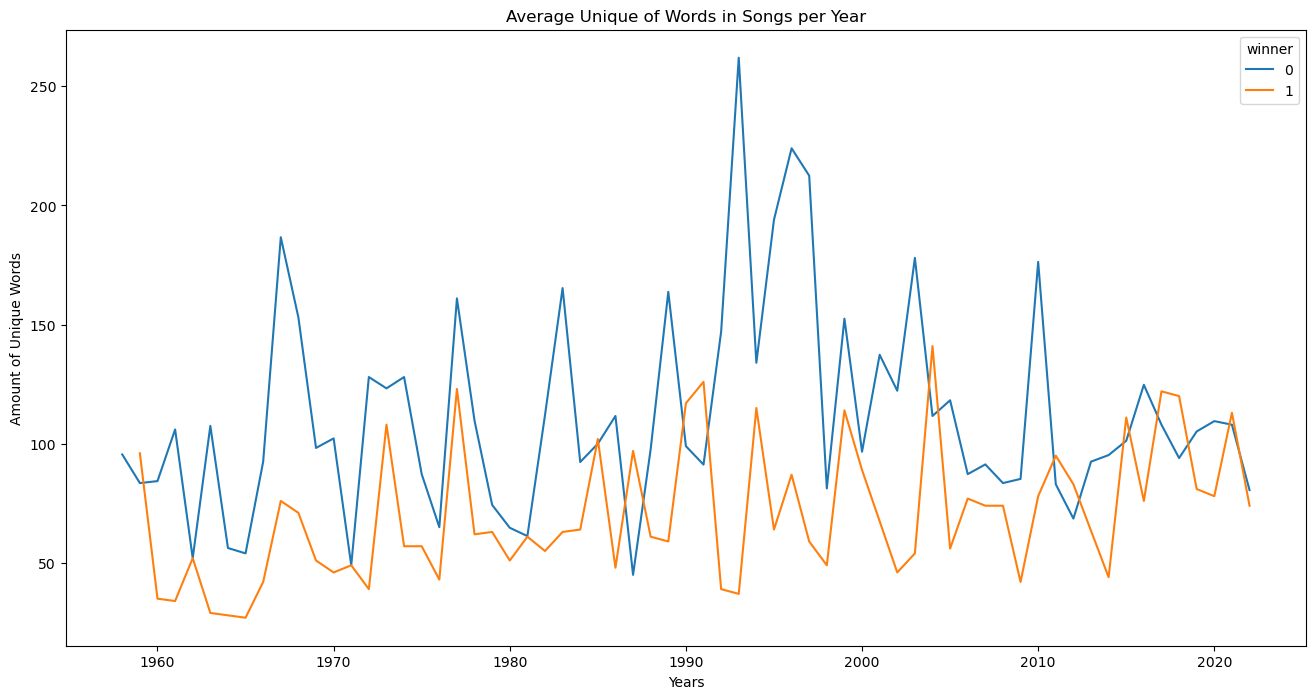

In [6]:
# Plot the average amount of unique words each year
plt.figure(figsize=(16,8))
sns.lineplot(data=analysis_df, x='year', y='unique_word_count', hue='winner', ci=None)
plt.title('Average Unique of Words in Songs per Year')
plt.xlabel('Years')
plt.ylabel('Amount of Unique Words')
plt.savefig("unique_word_count.png", bbox_inches='tight')
plt.show()


Profanity over the decades.

In [7]:
# add decades detail
# Define the decade-to-year range mapping
decade_map = {'50s': (1950, 1960),
              '60s': (1960, 1970),
              '70s': (1970, 1980),
              '80s': (1980, 1990),
              '90s': (1990, 2000),
              '00s': (2000, 2010),
              '10s': (2010, 2020),
              '20s': (2020, 2030)}

# Apply the mapping using the `map()` method
def get_decade(year):
    for key, value in decade_map.items():
        if value[0] <= year < value[1]:
            return key
    return 'unknown'

analysis_df['decade'] = analysis_df['year'].apply(get_decade)

In [8]:
decades = ['50s', '60s', '70s', '80s', '90s', '00s', '10s', '20s']
common_words = {}

for decade in decades:
    # Filter the DataFrame by decade
    df_decade = analysis_df.loc[analysis_df['decade'] == decade]
    # Join the cleaned lyrics of all songs in the decade
    for i in range(len(df_decade['preprocessed_lyrics'])):
        lyrics = ' '.join(df_decade['preprocessed_lyrics'].iloc[0]).split()
    # Count the occurrences of each word and take the 200 most common words
        common_words[decade] = Counter(lyrics).most_common(200)

commonWords50 = common_words['50s']
commonWords60 = common_words['60s']
commonWords70 = common_words['70s']
commonWords80 = common_words['80s']
commonWords90 = common_words['90s']
commonWords00 = common_words['00s']
commonWords10 = common_words['10s']
commonWords20 = common_words['20s']

https://github.com/coffee-and-fun/google-profanity-words

In [9]:
url  = 'https://raw.githubusercontent.com/coffee-and-fun/google-profanity-words/main/data/list.txt'
google_profanity_words = request.urlopen(url)

profane_words = []
for line in google_profanity_words:
    profane_words.append(line.decode("utf-8").strip())

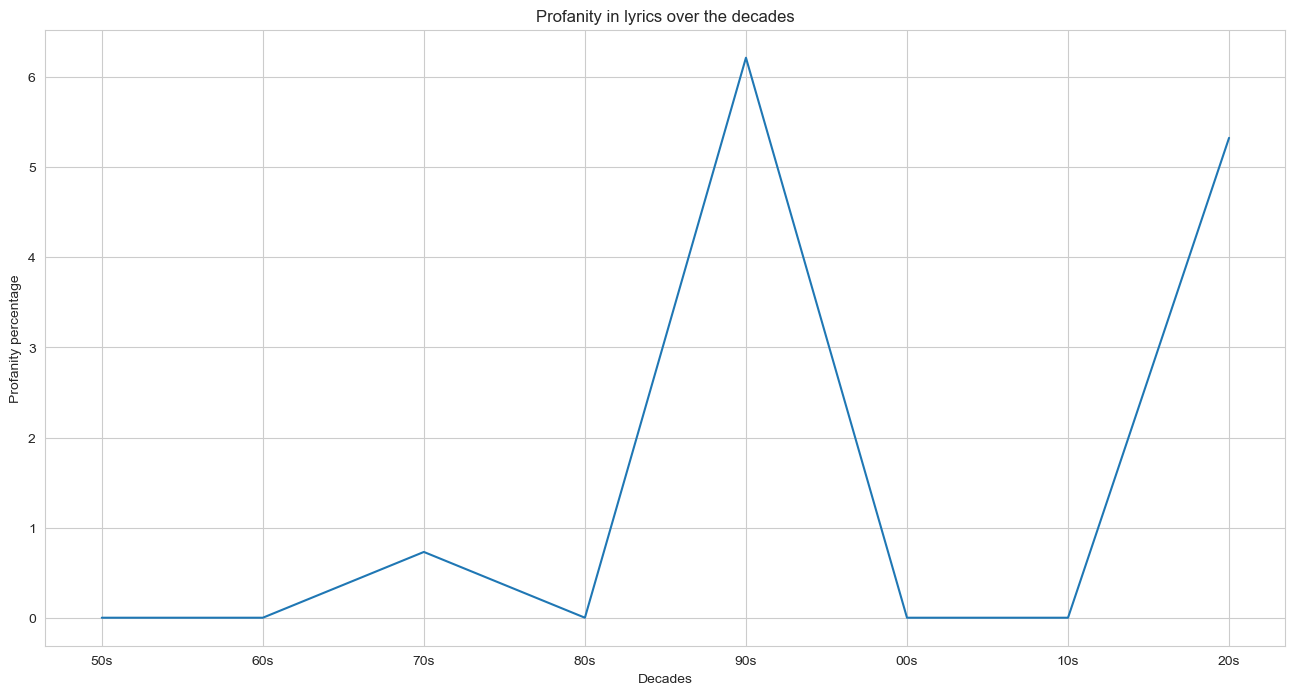

In [10]:
commonWords = [commonWords50, commonWords60, commonWords70, commonWords80, commonWords90, commonWords00, commonWords10, commonWords20]
counts = []
for item in commonWords:
    totalCount = 0
    count = 0
    for key,value in item:
        if key in profane_words:
            count += value
        totalCount += value
    counts.append(count/totalCount * 100)

profanity_dict = {}
for i, decade in enumerate(decades):
    profanity_dict[decade] = counts[i]

profanity_df = pd.DataFrame.from_dict(profanity_dict, orient='index', columns=['Profanity Percentage'])

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
sns.lineplot(data=profanity_df, x=profanity_df.index, y='Profanity Percentage')
plt.title("Profanity in lyrics over the decades")
plt.xlabel("Decades")
plt.ylabel("Profanity percentage")
plt.savefig("profanity.png", bbox_inches='tight')
plt.show()




Wordcloud.

In [11]:
winner_df = analysis_df[analysis_df.winner==1]
nominee_df = analysis_df[analysis_df.winner==0]

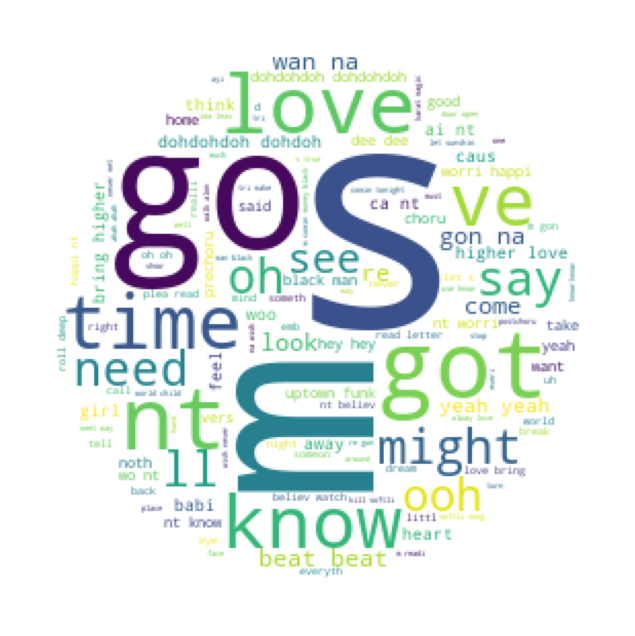

In [12]:
#convert list to string and generate

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

unique_string = ' '.join(winner_df['preprocessed_lyrics'].sum())
wordcloud = WordCloud(background_color="white",
                      mask=mask,
                      width = 1000,
                      height = 500).generate(unique_string)
plt.figure(figsize=(19,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("wordcloud_winner.png", bbox_inches='tight')
plt.show()
plt.close()

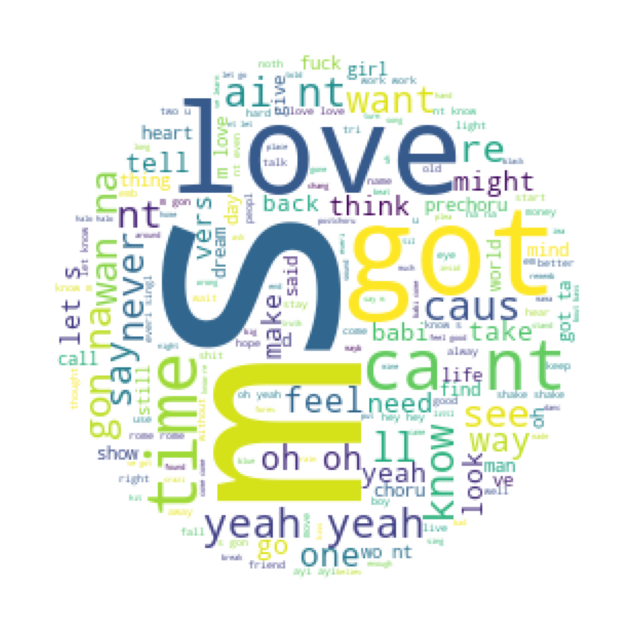

In [13]:
#convert list to string and generate

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

unique_string = ' '.join(nominee_df['preprocessed_lyrics'].sum())
wordcloud = WordCloud(background_color="white",
                      mask=mask,
                      width = 1000,
                      height = 500).generate(unique_string)
plt.figure(figsize=(19,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("wordcloud_nominees.png", bbox_inches='tight')
plt.show()
plt.close()

Multiple Grammy winners.
Can you guess who has won more than 1 Grammy Best Record?

In [14]:
dupes = analysis_df[analysis_df.winner==1]
dupes = dupes[dupes['artist'].duplicated(keep=False)]
dupes.sort_values('artist')

,title,artist,winner,year,lyrics,preprocessed_lyrics,language,anger_pct,anticipation_pct,disgust_pct,...,joy_pct,negative_pct,positive_pct,sadness_pct,surprise_pct,trust_pct,gloom_index,word_count,unique_word_count,decade
210,"Up, Up And Away",5th Dimension,1,1967,TranslationsItalianoРусскийFrançaisNederlandsD...,[translationsitalianofranaisnederlandsdeutsche...,en,0.000001,0.024390,0.000001,...,0.016260,0.024390,0.048780,0.020325,0.000001,0.016260,23.857309,188,76,60s
296,Aquarius/Let The Sunshine In (The Flesh Failures),5th Dimension,1,1969,Aquarius / Let the Sunshine In (The Flesh Fail...,"[aquariu, let, sunshin, flesh, failur, part, a...",en,0.004630,0.023148,0.009259,...,0.037037,0.074074,0.083333,0.000001,0.013889,0.032407,12.790693,159,51,60s
123,Rolling In The Deep,Adele,1,2011,TranslationsFrançaisEspañolPortuguêsΕλληνικάRo...,"[translationsfranaisespaolportugusrol, deep, s...",en,0.014963,0.012469,0.014963,...,0.019950,0.047382,0.032419,0.047382,0.000001,0.014963,34.167736,307,95,10s
316,Hello,Adele,1,2016,TranslationsTürkçePortuguêsPortuguêsEspañolHel...,"[translationstrkeportugusportugusespaolhello, ...",en,0.000001,0.029316,0.000001,...,0.013029,0.006515,0.019544,0.009772,0.013029,0.013029,8.806742,222,76,10s
1,Bad Guy,Billie Eilish,1,2019,TranslationsHrvatskiTürkçeSvenskaEspañolРусски...,[translationshrvatskitrkesvenskaespaolromnport...,en,0.082474,0.036082,0.082474,...,0.025773,0.103093,0.025773,0.103093,0.015464,0.025773,95.585958,166,81,10s
99,Everything I Wanted,Billie Eilish,1,2020,TranslationsTürkçeEspañolРусскийRomânăPortuguê...,[translationstrkeespaolromnportuguspolskinorsk...,en,0.028708,0.019139,0.019139,...,0.009569,0.043062,0.019139,0.043062,0.004785,0.004785,37.801001,148,78,20s
14,Change The World,Eric Clapton,1,1996,TranslationsTürkçeEspañolPolskiItalianoFrançai...,[translationstrkeespaolpolskiitalianofranaisne...,en,0.063433,0.067164,0.033582,...,0.026119,0.074627,0.085821,0.055970,0.026119,0.037313,62.231678,197,87,90s
151,Tears In Heaven,Eric Clapton,1,1992,Tears in Heaven \nWould you know my name if I ...,"[tear, heaven, know, name, saw, heaven, saw, h...",en,0.000001,0.053191,0.000001,...,0.000001,0.042553,0.000000,0.042553,0.010638,0.000001,29.717754,72,39,90s
188,Days Of Wine And Roses,Henry Mancini,1,1963,Days of Wine and Roses The days of wine and ro...,"[day, wine, rose, day, wine, rose, laugh, run,...",en,0.000001,0.018182,0.000001,...,0.072727,0.000001,0.109091,0.036364,0.054545,0.054545,26.515951,49,29,60s
221,Moon River,Henry Mancini,1,1961,TranslationsEspañolMoon River [Verse]\nMoon ri...,"[translationsespaolmoon, river, vers, moon, ri...",en,0.020833,0.020833,0.000001,...,0.020833,0.041667,0.020833,0.020833,0.000001,0.020833,22.963924,43,34,60s


Gloom Index by year.

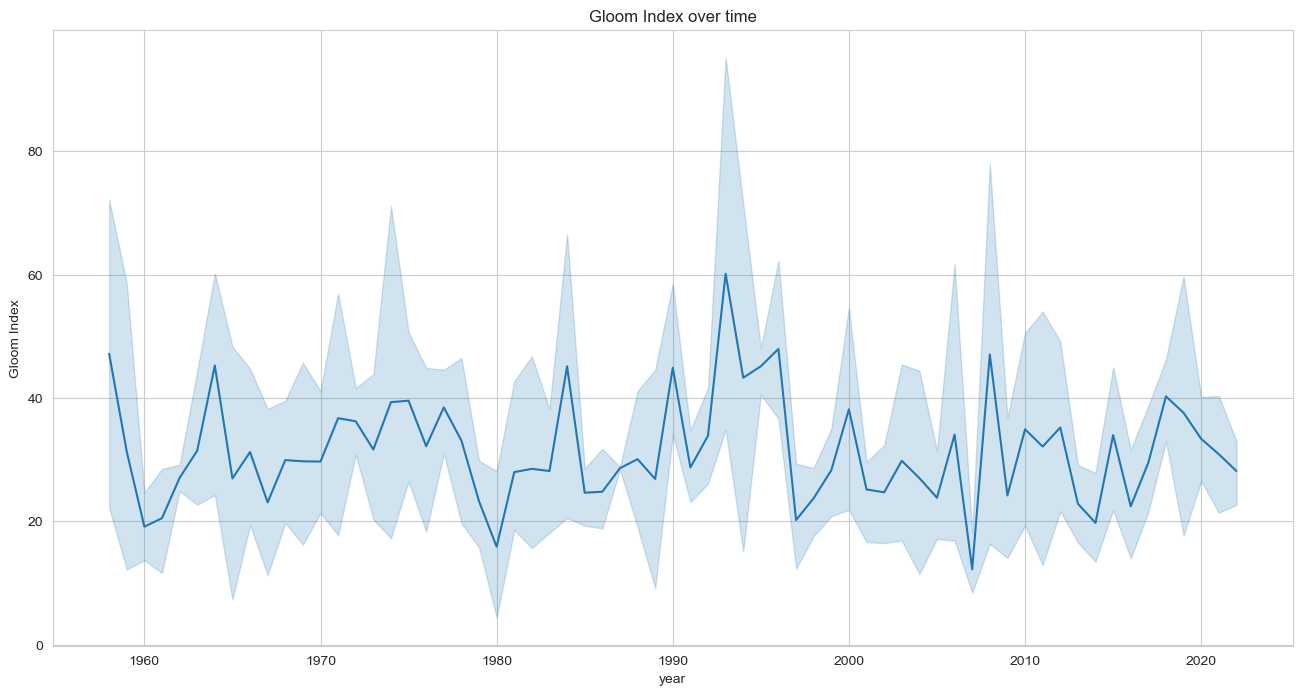

In [15]:
plt.figure(figsize=(16,8))
tg = sns.lineplot(data=analysis_df, x='year', y='gloom_index');
tg.set_ylabel("Gloom Index")
tg.set_title("Gloom Index over time")
plt.savefig("gloom_index_over_time.png", bbox_inches='tight')


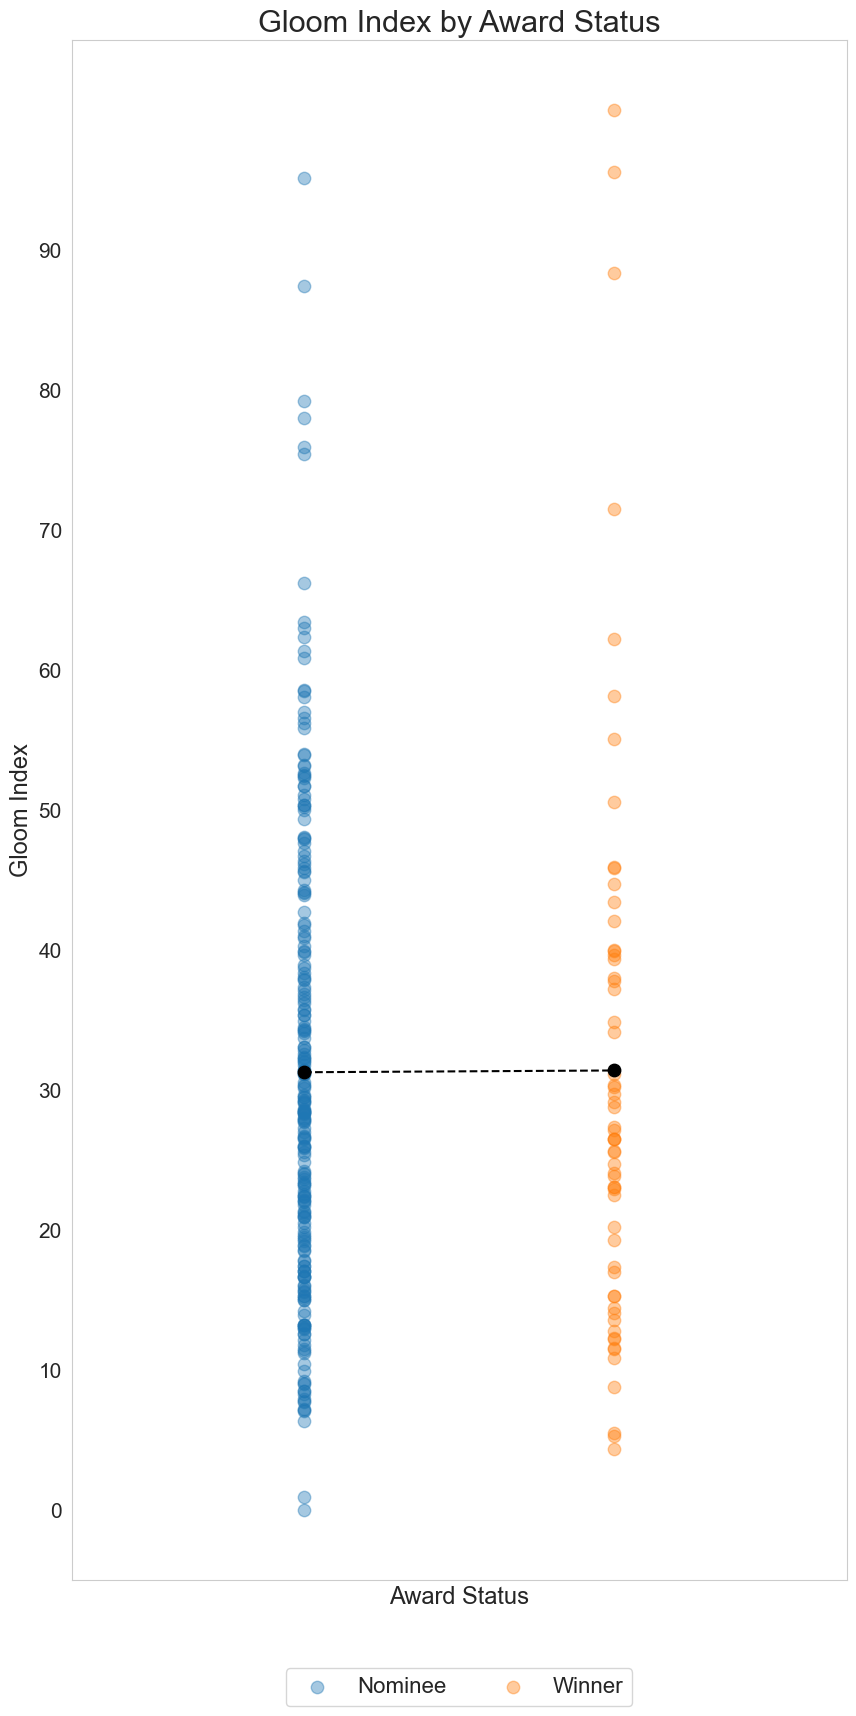

<module 'matplotlib.pyplot' from '/Users/luisquinonespr/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [16]:
from make_diff_graph import make_diff_graph
from make_time_graph import make_time_graph

make_diff_graph(analysis_df)

<module 'matplotlib.pyplot' from '/Users/luisquinonespr/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

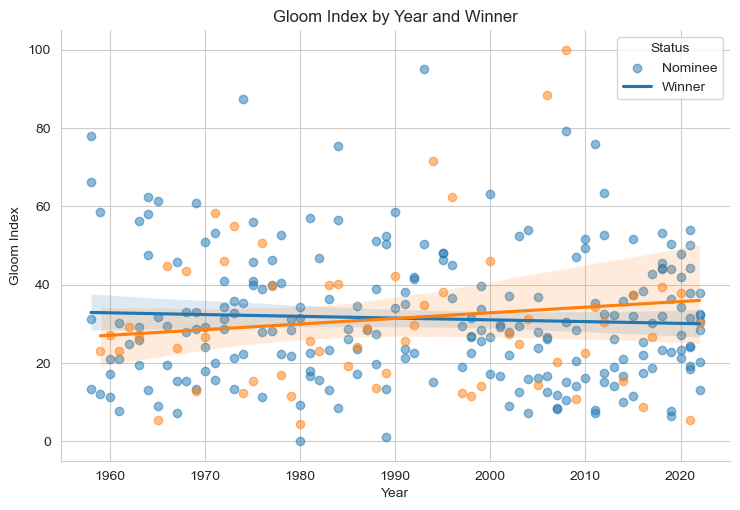

In [17]:
make_time_graph(analysis_df)